In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from chinese_calendar import is_workday, is_holiday
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

In [18]:
data_path = 'E:\\leitianjian\\Dataset\\competition\\traffic1\\'

In [19]:
tti = pd.read_csv(data_path + 'train_TTI.csv')
tti['time'] = pd.to_datetime(tti['time'])
tti['year'] = tti['time'].dt.year
tti['month'] = tti['time'].dt.month
tti['day'] = tti['time'].dt.day
tti['hour'] = tti['time'].dt.hour
tti['minute'] = tti['time'].dt.minute
tti.head()

,id_road,TTI,speed,time,year,month,day,hour,minute
0,276183,1.03472,69.6197,2019-01-01 00:00:00,2019,1,1,0,0
1,276183,1.03506,69.6275,2019-01-01 00:10:00,2019,1,1,0,10
2,276183,1.04166,69.1003,2019-01-01 00:20:00,2019,1,1,0,20
3,276183,1.02642,70.1266,2019-01-01 00:30:00,2019,1,1,0,30
4,276183,1.01442,70.9565,2019-01-01 00:40:00,2019,1,1,0,40


In [20]:
test_tti = pd.read_csv(data_path + 'toPredict_train_TTI.csv')
test_tti['time'] = pd.to_datetime(test_tti['time'])
test_tti.tail()

,id_road,TTI,speed,time
6043,276738,1.47263,27.9016,2020-01-01 20:10:00
6044,276738,1.47895,27.7825,2020-01-01 20:20:00
6045,276738,1.37184,29.9517,2020-01-01 20:30:00
6046,276738,1.41281,29.0830,2020-01-01 20:40:00
6047,276738,1.57808,26.0371,2020-01-01 20:50:00


In [21]:
pred_tti = pd.read_csv(data_path + 'toPredict_noLabel.csv')
pred_tti['time'] = pd.to_datetime(pred_tti['time'])
pred_tti['year'] = pred_tti['time'].dt.year
pred_tti['month'] = pred_tti['time'].dt.month
pred_tti['day'] = pred_tti['time'].dt.day
pred_tti['hour'] = pred_tti['time'].dt.hour
pred_tti['minute'] = pred_tti['time'].dt.minute
pred_tti.head()

,id_sample,id_road,time,year,month,day,hour,minute
0,0,276183,2019-12-21 08:30:00,2019,12,21,8,30
1,1,276183,2019-12-21 08:40:00,2019,12,21,8,40
2,2,276183,2019-12-21 08:50:00,2019,12,21,8,50
3,3,276183,2019-12-21 10:30:00,2019,12,21,10,30
4,4,276183,2019-12-21 10:40:00,2019,12,21,10,40


In [22]:
time_line = pd.DataFrame({'time': pd.date_range('20191001', '20191221', freq='10min')})
time_line['holiday'] = time_line['time'].apply(is_holiday)*1
time_line['year'] = time_line['time'].dt.year
time_line['month'] = time_line['time'].dt.month
time_line['day'] = time_line['time'].dt.day
time_line.head()

,time,holiday,year,month,day
0,2019-10-01 00:00:00,1,2019,10,1
1,2019-10-01 00:10:00,1,2019,10,1
2,2019-10-01 00:20:00,1,2019,10,1
3,2019-10-01 00:30:00,1,2019,10,1
4,2019-10-01 00:40:00,1,2019,10,1


In [23]:
tti_datetype = tti.groupby('id_road').apply(lambda x: pd.merge(x, time_line[['time', 'holiday']], how='inner'))
tti_datetype.drop('id_road', inplace=True, axis=1)
tti_datetype.reset_index('id_road', inplace=True)
tti_datetype.head()

,id_road,TTI,speed,time,year,month,day,hour,minute,holiday
0,275911,1.09397,62.7034,2019-10-01 00:00:00,2019,10,1,0,0,1
1,275911,1.09353,62.7287,2019-10-01 00:10:00,2019,10,1,0,10,1
2,275911,1.08355,63.3062,2019-10-01 00:20:00,2019,10,1,0,20,1
3,275911,1.09715,62.5218,2019-10-01 00:30:00,2019,10,1,0,30,1
4,275911,1.07370,63.8872,2019-10-01 00:40:00,2019,10,1,0,40,1


In [28]:
tti_HA = tti_datetype.groupby(['id_road', 'hour', 'minute', 'holiday'])[['TTI']].median()
tti_HA.reset_index(inplace=True)
tti_HA_workday = tti_HA[tti_HA['holiday']==0].drop('holiday', axis=1)
tti_HA_holiday = tti_HA[tti_HA['holiday']==1].drop('holiday', axis=1)
tti_HA_workday.head()
tti_HA_workday.groupby(['id_road']).count()

,hour,minute,TTI
id_road,,,
275911,144,144,144
275912,144,144,144
276183,144,144,144
276184,144,144,144
276240,144,144,144
276241,144,144,144
276264,144,144,144
276265,144,144,144
276268,144,144,144


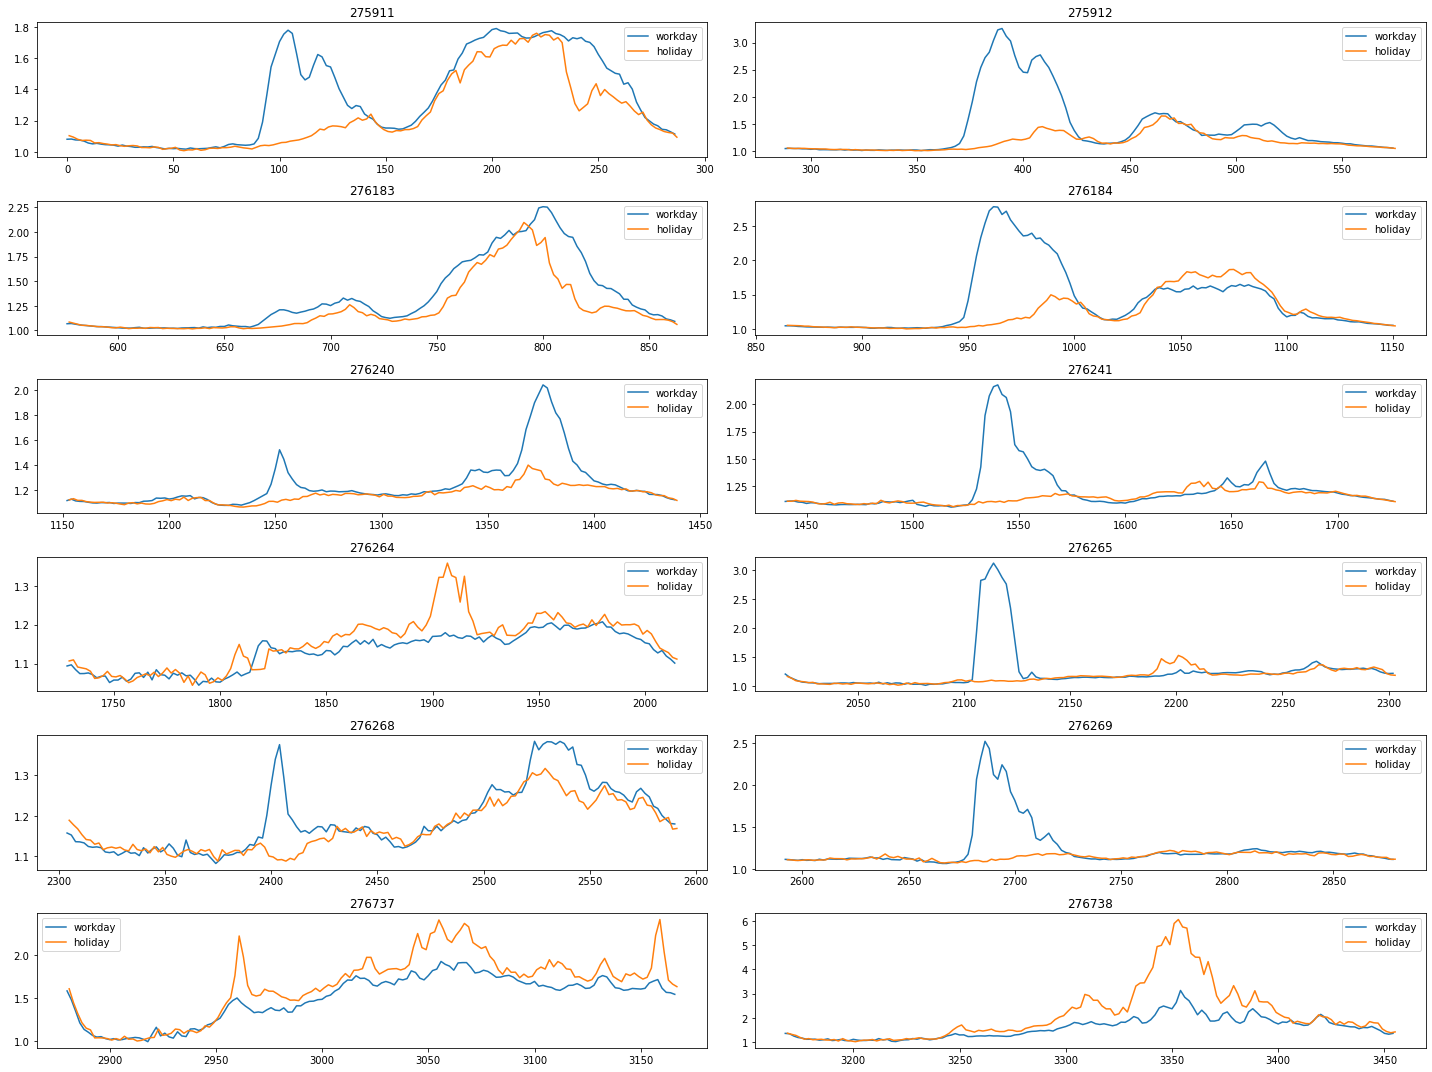

In [29]:
plt.figure(figsize=(20, 15))
for idx, id_road in enumerate(tti_HA_workday['id_road'].unique()):
    plt.subplot(6, 2, idx+1)
    plt.plot(tti_HA_workday[tti_HA_workday['id_road']==id_road]['TTI'], label='workday')
    plt.plot(tti_HA_holiday[tti_HA_holiday['id_road']==id_road]['TTI'], label='holiday')
    plt.legend()
    plt.title(id_road)
plt.tight_layout()

In [31]:
tti_HA_workday['TTI_shift1'] = tti_HA_workday['TTI'].shift(1)
tti_HA_workday['ratio1'] = tti_HA_workday['TTI'] / tti_HA_workday['TTI_shift1']
tti_HA_workday['ratio2'] = tti_HA_workday['ratio1'].shift(1)
tti_HA_workday['ratio3'] = tti_HA_workday['ratio2'].shift(1)
tti_HA_workday.head()

,id_road,hour,minute,TTI,TTI_shift1,ratio1,ratio2,ratio3
0,275911,0,0,1.07998,NaN,NaN,NaN,NaN
2,275911,0,10,1.08135,1.07998,1.001269,NaN,NaN
4,275911,0,20,1.07548,1.08135,0.994572,1.001269,NaN
6,275911,0,30,1.07438,1.07548,0.998977,0.994572,1.001269
8,275911,0,40,1.06793,1.07438,0.993997,0.998977,0.994572


In [32]:
tti_HA_holiday['TTI_shift1'] = tti_HA_holiday['TTI'].shift(1)
tti_HA_holiday['ratio1'] = tti_HA_holiday['TTI'] / tti_HA_holiday['TTI_shift1']
tti_HA_holiday['ratio2'] = tti_HA_holiday['ratio1'].shift(1)
tti_HA_holiday['ratio3'] = tti_HA_holiday['ratio2'].shift(1)
tti_HA_holiday.head()

,id_road,hour,minute,TTI,TTI_shift1,ratio1,ratio2,ratio3
1,275911,0,0,1.102750,NaN,NaN,NaN,NaN
3,275911,0,10,1.093560,1.102750,0.991666,NaN,NaN
5,275911,0,20,1.079680,1.093560,0.987308,0.991666,NaN
7,275911,0,30,1.072145,1.079680,0.993021,0.987308,0.991666
9,275911,0,40,1.073960,1.072145,1.001693,0.993021,0.987308


In [33]:
tti_HA_workday['holiday'] = 0
tti_HA_holiday['holiday'] = 1
tti_HA_ratio = pd.concat([tti_HA_workday, tti_HA_holiday])
tti_HA_ratio.drop(['TTI', 'TTI_shift1'], inplace=True, axis=1)
tti_HA_ratio.head()

,id_road,hour,minute,ratio1,ratio2,ratio3,holiday
0,275911,0,0,NaN,NaN,NaN,0
2,275911,0,10,1.001269,NaN,NaN,0
4,275911,0,20,0.994572,1.001269,NaN,0
6,275911,0,30,0.998977,0.994572,1.001269,0
8,275911,0,40,0.993997,0.998977,0.994572,0


In [34]:

pred_tti['step1'] = 1
pred_tti['step2'] = 0
pred_tti['step3'] = 0


pred_tti['step2'][(pred_tti['minute']==10)|(pred_tti['minute']==40)] = 1
pred_tti['step2'][(pred_tti['minute']==20)|(pred_tti['minute']==50)] = 1

pred_tti['step3'][(pred_tti['minute']==20)|(pred_tti['minute']==50)] = 1
pred_tti.head(10)

C:\Users\leitianjian\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\leitianjian\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\leitianjian\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,id_sample,id_road,time,year,month,day,hour,minute,step1,step2,step3
0,0,276183,2019-12-21 08:30:00,2019,12,21,8,30,1,0,0
1,1,276183,2019-12-21 08:40:00,2019,12,21,8,40,1,1,0
2,2,276183,2019-12-21 08:50:00,2019,12,21,8,50,1,1,1
3,3,276183,2019-12-21 10:30:00,2019,12,21,10,30,1,0,0
4,4,276183,2019-12-21 10:40:00,2019,12,21,10,40,1,1,0
5,5,276183,2019-12-21 10:50:00,2019,12,21,10,50,1,1,1
6,6,276183,2019-12-21 12:30:00,2019,12,21,12,30,1,0,0
7,7,276183,2019-12-21 12:40:00,2019,12,21,12,40,1,1,0
8,8,276183,2019-12-21 12:50:00,2019,12,21,12,50,1,1,1
9,9,276183,2019-12-21 14:30:00,2019,12,21,14,30,1,0,0


In [35]:
test_timeline = pd.DataFrame({'time': pd.date_range('20191221 07:30:00', '20200101 21:30:00', freq='10min')})
test_tti_complete = test_tti.groupby('id_road').apply(lambda x: pd.merge(x, test_timeline, how='outer'))
test_tti_complete.drop('id_road', inplace=True, axis=1)
test_tti_complete.reset_index('id_road', inplace=True)
test_tti_complete.sort_values(['id_road', 'time'], inplace=True)
test_tti_complete.reset_index(inplace=True, drop=True)
test_tti_complete['hour'] = test_tti_complete['time'].dt.hour
test_tti_complete['minute'] = test_tti_complete['time'].dt.minute
test_tti_complete['holiday'] = test_tti_complete['time'].apply(is_holiday)*1
test_tti_complete['TTI'].fillna(method='ffill', inplace=True)
test_tti_complete.head(20)

,id_road,TTI,speed,time,hour,minute,holiday
0,275911,1.05410,65.9403,2019-12-21 07:30:00,7,30,1
1,275911,1.06187,65.4578,2019-12-21 07:40:00,7,40,1
2,275911,1.04992,66.2031,2019-12-21 07:50:00,7,50,1
3,275911,1.04714,66.3787,2019-12-21 08:00:00,8,0,1
4,275911,1.08100,64.2997,2019-12-21 08:10:00,8,10,1
5,275911,1.09618,63.4092,2019-12-21 08:20:00,8,20,1
6,275911,1.09618,NaN,2019-12-21 08:30:00,8,30,1
7,275911,1.09618,NaN,2019-12-21 08:40:00,8,40,1
8,275911,1.09618,NaN,2019-12-21 08:50:00,8,50,1
9,275911,1.09618,NaN,2019-12-21 09:00:00,9,0,1


In [36]:
test_tti_complete = pd.merge(test_tti_complete, tti_HA_ratio, on=['id_road', 'hour', 'minute', 'holiday'], how='left')
test_tti_complete = pd.merge(test_tti_complete, pred_tti[['id_road', 'time', 'step1', 'step2', 'step3']], on=['id_road', 'time'], how='left')
test_tti_complete.head(20)

,id_road,TTI,speed,time,hour,minute,holiday,ratio1,ratio2,ratio3,step1,step2,step3
0,275911,1.05410,65.9403,2019-12-21 07:30:00,7,30,1,1.009690,1.010435,0.995919,NaN,NaN,NaN
1,275911,1.06187,65.4578,2019-12-21 07:40:00,7,40,1,1.003014,1.009690,1.010435,NaN,NaN,NaN
2,275911,1.04992,66.2031,2019-12-21 07:50:00,7,50,1,0.998012,1.003014,1.009690,NaN,NaN,NaN
3,275911,1.04714,66.3787,2019-12-21 08:00:00,8,0,1,1.004440,0.998012,1.003014,NaN,NaN,NaN
4,275911,1.08100,64.2997,2019-12-21 08:10:00,8,10,1,1.007064,1.004440,0.998012,NaN,NaN,NaN
5,275911,1.09618,63.4092,2019-12-21 08:20:00,8,20,1,1.007091,1.007064,1.004440,NaN,NaN,NaN
6,275911,1.09618,NaN,2019-12-21 08:30:00,8,30,1,1.001388,1.007091,1.007064,1.0,0.0,0.0
7,275911,1.09618,NaN,2019-12-21 08:40:00,8,40,1,1.006927,1.001388,1.007091,1.0,1.0,0.0
8,275911,1.09618,NaN,2019-12-21 08:50:00,8,50,1,1.003409,1.006927,1.001388,1.0,1.0,1.0
9,275911,1.09618,NaN,2019-12-21 09:00:00,9,0,1,1.003990,1.003409,1.006927,NaN,NaN,NaN


In [37]:
test_tti_complete['ratio'] = (np.log(test_tti_complete['ratio1'])*test_tti_complete['step1'] +\
                              np.log(test_tti_complete['ratio2'])*test_tti_complete['step2'] +\
                              np.log(test_tti_complete['ratio3'])*test_tti_complete['step3']).apply(np.exp)
test_tti_complete.head(20)

,id_road,TTI,speed,time,hour,minute,holiday,ratio1,ratio2,ratio3,step1,step2,step3,ratio
0,275911,1.05410,65.9403,2019-12-21 07:30:00,7,30,1,1.009690,1.010435,0.995919,NaN,NaN,NaN,NaN
1,275911,1.06187,65.4578,2019-12-21 07:40:00,7,40,1,1.003014,1.009690,1.010435,NaN,NaN,NaN,NaN
2,275911,1.04992,66.2031,2019-12-21 07:50:00,7,50,1,0.998012,1.003014,1.009690,NaN,NaN,NaN,NaN
3,275911,1.04714,66.3787,2019-12-21 08:00:00,8,0,1,1.004440,0.998012,1.003014,NaN,NaN,NaN,NaN
4,275911,1.08100,64.2997,2019-12-21 08:10:00,8,10,1,1.007064,1.004440,0.998012,NaN,NaN,NaN,NaN
5,275911,1.09618,63.4092,2019-12-21 08:20:00,8,20,1,1.007091,1.007064,1.004440,NaN,NaN,NaN,NaN
6,275911,1.09618,NaN,2019-12-21 08:30:00,8,30,1,1.001388,1.007091,1.007064,1.0,0.0,0.0,1.001388
7,275911,1.09618,NaN,2019-12-21 08:40:00,8,40,1,1.006927,1.001388,1.007091,1.0,1.0,0.0,1.008325
8,275911,1.09618,NaN,2019-12-21 08:50:00,8,50,1,1.003409,1.006927,1.001388,1.0,1.0,1.0,1.011763
9,275911,1.09618,NaN,2019-12-21 09:00:00,9,0,1,1.003990,1.003409,1.006927,NaN,NaN,NaN,NaN


In [38]:
test_tti_complete['TTI'] = test_tti_complete['TTI'] * test_tti_complete['ratio']
test_tti_complete.head(20)

,id_road,TTI,speed,time,hour,minute,holiday,ratio1,ratio2,ratio3,step1,step2,step3,ratio
0,275911,NaN,65.9403,2019-12-21 07:30:00,7,30,1,1.009690,1.010435,0.995919,NaN,NaN,NaN,NaN
1,275911,NaN,65.4578,2019-12-21 07:40:00,7,40,1,1.003014,1.009690,1.010435,NaN,NaN,NaN,NaN
2,275911,NaN,66.2031,2019-12-21 07:50:00,7,50,1,0.998012,1.003014,1.009690,NaN,NaN,NaN,NaN
3,275911,NaN,66.3787,2019-12-21 08:00:00,8,0,1,1.004440,0.998012,1.003014,NaN,NaN,NaN,NaN
4,275911,NaN,64.2997,2019-12-21 08:10:00,8,10,1,1.007064,1.004440,0.998012,NaN,NaN,NaN,NaN
5,275911,NaN,63.4092,2019-12-21 08:20:00,8,20,1,1.007091,1.007064,1.004440,NaN,NaN,NaN,NaN
6,275911,1.097702,NaN,2019-12-21 08:30:00,8,30,1,1.001388,1.007091,1.007064,1.0,0.0,0.0,1.001388
7,275911,1.105306,NaN,2019-12-21 08:40:00,8,40,1,1.006927,1.001388,1.007091,1.0,1.0,0.0,1.008325
8,275911,1.109074,NaN,2019-12-21 08:50:00,8,50,1,1.003409,1.006927,1.001388,1.0,1.0,1.0,1.011763
9,275911,NaN,NaN,2019-12-21 09:00:00,9,0,1,1.003990,1.003409,1.006927,NaN,NaN,NaN,NaN


In [39]:
pred_tti_result = pd.merge(pred_tti, test_tti_complete, how='left')
pred_tti_result.head()

,id_sample,id_road,time,year,month,day,hour,minute,step1,step2,step3,TTI,speed,holiday,ratio1,ratio2,ratio3,ratio
0,0,276183,2019-12-21 08:30:00,2019,12,21,8,30,1,0,0,1.073220,NaN,1,1.007482,1.003907,1.003889,1.007482
1,1,276183,2019-12-21 08:40:00,2019,12,21,8,40,1,1,0,1.080818,NaN,1,1.007079,1.007482,1.003907,1.014614
2,2,276183,2019-12-21 08:50:00,2019,12,21,8,50,1,1,1,1.091030,NaN,1,1.009448,1.007079,1.007482,1.024201
3,3,276183,2019-12-21 10:30:00,2019,12,21,10,30,1,0,0,1.538395,NaN,1,1.008294,1.001841,1.020252,1.008294
4,4,276183,2019-12-21 10:40:00,2019,12,21,10,40,1,1,0,1.554415,NaN,1,1.010414,1.008294,1.001841,1.018794
